# Emotion Recognizer

## Importing libraries

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Flatten,Embedding
from keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Loading data

In [3]:
train_data = open(r"train.txt").readlines()
texts = []
labels = []

for i in train_data:
    j = i.split(";")
    texts.append(j[0])
    labels.append(j[1].rstrip("\n"))

## Encoding the labels

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels,num_classes=6)
labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

## Removing Stopwords

In [33]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
cleaned_texts = np.array([remove_stopwords(text) for text in texts])

## Setting Hyperparameters for Tokenizer and Padding

In [82]:
num_words = len(set(np.hstack(np.array([x.split() for x in cleaned_texts],dtype=object))))
maxlen = max([len(x.split()) for x in cleaned_texts])
num_words,maxlen

(15062, 35)

## Tokenization and Padding

In [83]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [84]:
data = pad_sequences(sequences,maxlen=maxlen)
data.shape

(16000, 35)

## Building the single-layered LSTM network

In [86]:
model = Sequential([Embedding(input_dim=num_words,output_dim=100),
                  LSTM(64,input_shape=(maxlen,100)),
                  Dense(6,activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Fitting the model with data

In [96]:
history = model.fit(data,labels,epochs=8,validation_data=(test_data,test_labels))

Epoch 1/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9926 - loss: 0.0211 - val_accuracy: 0.9060 - val_loss: 0.3759
Epoch 2/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9943 - loss: 0.0182 - val_accuracy: 0.9090 - val_loss: 0.3647
Epoch 3/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9945 - loss: 0.0134 - val_accuracy: 0.9070 - val_loss: 0.4093
Epoch 4/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9945 - loss: 0.0145 - val_accuracy: 0.9015 - val_loss: 0.4396
Epoch 5/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9936 - loss: 0.0207 - val_accuracy: 0.9075 - val_loss: 0.3942
Epoch 6/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9957 - loss: 0.0125 - val_accuracy: 0.9065 - val_loss: 0.4229
Epoch 7/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9955 - loss: 0.0105 - val_accuracy: 0.9085 - val_loss: 0.4407
Epoch 8/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9966 - loss: 0.0083 - val_accu

## Evaluating the model

In [88]:
test_data = open(r"val.txt")
test_texts = []
test_labels = []
for i in test_data:
    j = i.split(";")
    test_texts.append(j[0])
    test_labels.append(j[1].rstrip("\n"))
test_data.close()
test_labels = encoder.transform(test_labels)
test_labels = to_categorical(test_labels,num_classes=6)
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(test_sequences,maxlen=maxlen)

In [97]:
loss,accuracy = model.evaluate(test_data,test_labels)
print("Loss:",round(loss,4))
print("Accuracy:",round(accuracy,4))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9131 - loss: 0.3980
Loss: 0.4536
Accuracy: 0.9045


<Axes: title={'center': 'Model Accuracy'}, xlabel='Epoch', ylabel='Accuracy'>

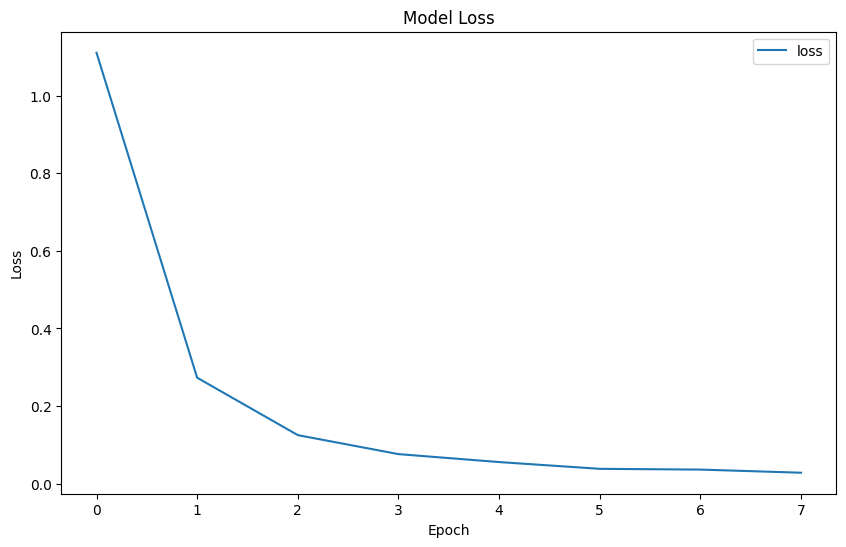

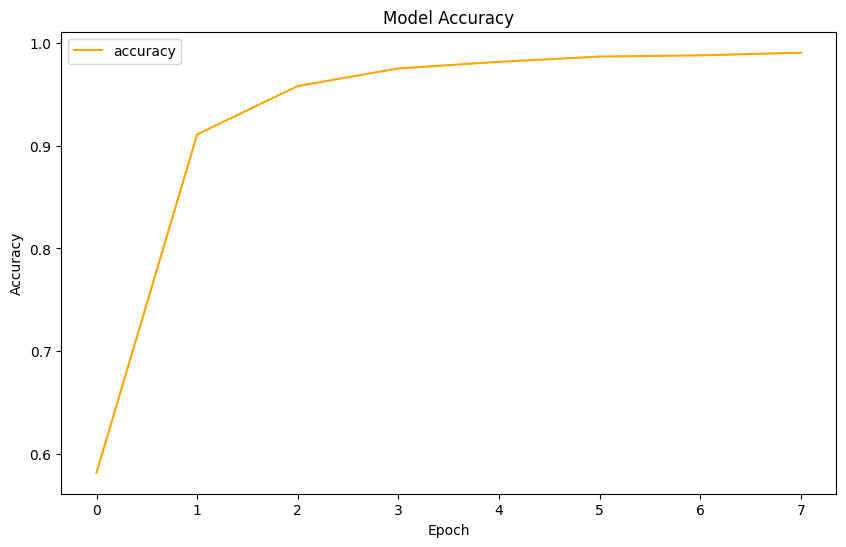

In [90]:
import pandas as pd

df_metrics = pd.DataFrame(history.history)
df_acc = df_metrics[['accuracy']]
df_loss = df_metrics[['loss']]
df_loss.plot(title='Model Loss',figsize=(10,6),xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(10,6),xlabel='Epoch',ylabel='Accuracy',color='orange')

## Manual Testing

In [92]:
text = ["Just watched the sunset, feeling incredibly blessed and thankful for this beautiful life! 🌅✨ #Grateful #Blessed #Sunset"]
text_seq = tokenizer.texts_to_sequences(np.array(text))
text_pad = pad_sequences(text_seq,maxlen=maxlen)
text_pad.shape

(1, 35)

In [93]:
import numpy as np
predictions = model.predict(text_pad)
predicted = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


In [95]:
if predicted == 0:
    print("Anger")
elif predicted == 1:
    print("Fear")
elif predicted == 2:
    print("Joy")
elif predicted == 3:
    print("Love")
elif predicted == 4:
    print("Sadness")
elif predicted == 5:
    print("Surprise,")

Joy
